# Predictiong heart deasease using ml 

This notebook looks into various python-based ml and data science libraries
in an attempt to build a ml model capable of predictiong whether or not someone
has heart desease based on the medical attributes.

We are going to take the following approach:
1. problem definition:  (Given clinical parameters about a patient, we predict whether or not they have heart desease.)
2. Data 

* The original data came from Cleaveland data from the UCI ml repository.https://archive.ics.uci.edu/dataset/45/heart+disease

* There is  also a version of it available on Kaggle:https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data

3. Evaluation
4. Features
5. Modelling
6. Exprimentation




## Preparing the tools

We're going to use pandas, Matplotlib, and Numpy for data analysis and manipulation.


In [1]:
# Import all the tools we need

# Regular EDA plotting libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Appear our plots inside the notebook
%matplotlib inline 


# Import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay




## Load data

In [2]:
df = pd.read_csv('data/heart-disease.csv')
# df.drop('id',axis =1, inplace= True)
# df.drop('dataset',axis =1, inplace= True)
df.shape #(rows,columns)


(303, 14)

## Data Exploration(exploratory data analysis or EDA)

The goal here is to findout more about the data and become a subject matter export on the dataset you're working with.

1. What questions are you going to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add/remove/change  features to get more out of your data?



In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#  Let's find out howmany of each class there
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

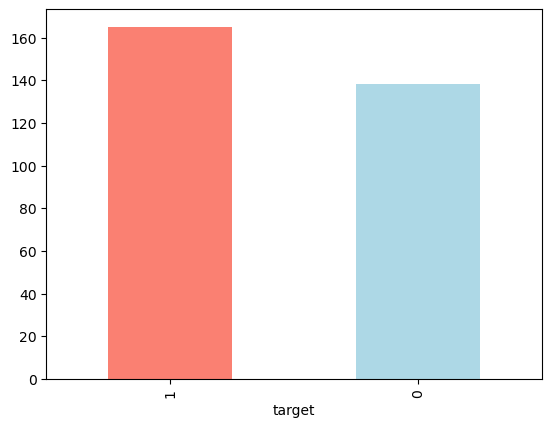

In [6]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# missing value?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heartdesease Frequency according to sex

compare different columns

Help us start gaining intuition about how the featurs relate to the target variable.


In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

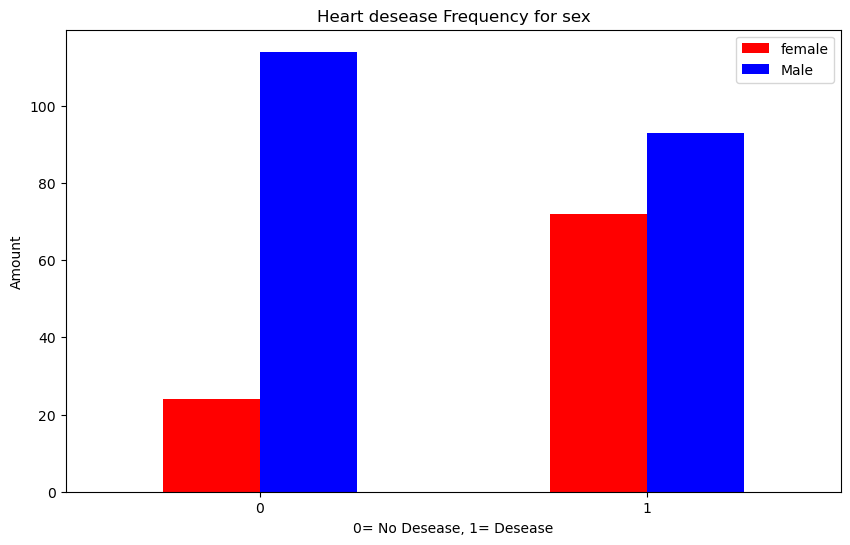

In [12]:
# Creat a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),
                                  color=('red','blue'))
plt.title('Heart desease Frequency for sex')
plt.xlabel('0= No Desease, 1= Desease')
plt.ylabel("Amount")
plt.legend(['female','Male'])
plt.xticks(rotation=0)

In [13]:
df['thalach'].value_counts()

#  Length: 91 means the number of different values in that colums 

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

## Age vs. Max heart rate for heart desease

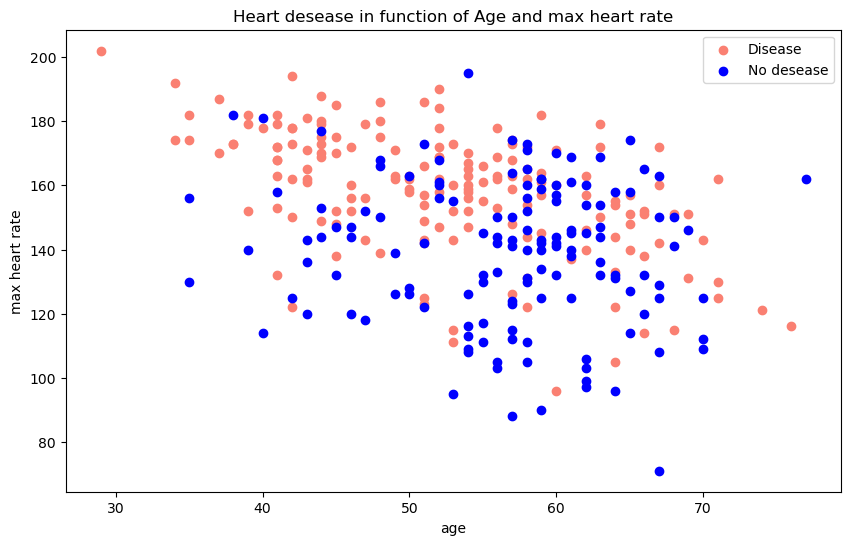

In [14]:
#  Create another figure
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

# scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='blue');


#  Add some helpful info
plt.title('Heart desease in function of Age and max heart rate')
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.legend(['Disease','No desease'])

In [15]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

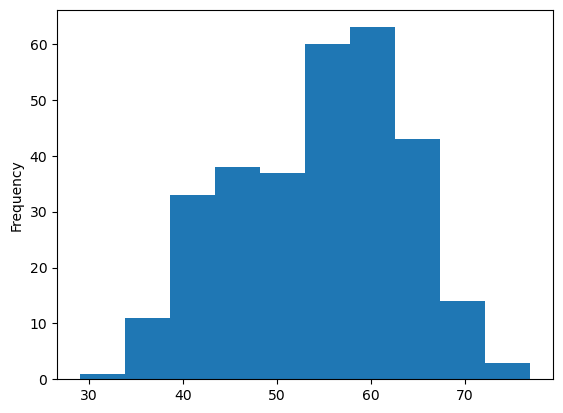

In [16]:
# Check the distribution of the age with a histogram
df.age.plot.hist();

### heart desease frequency per chest paintype (cp)

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

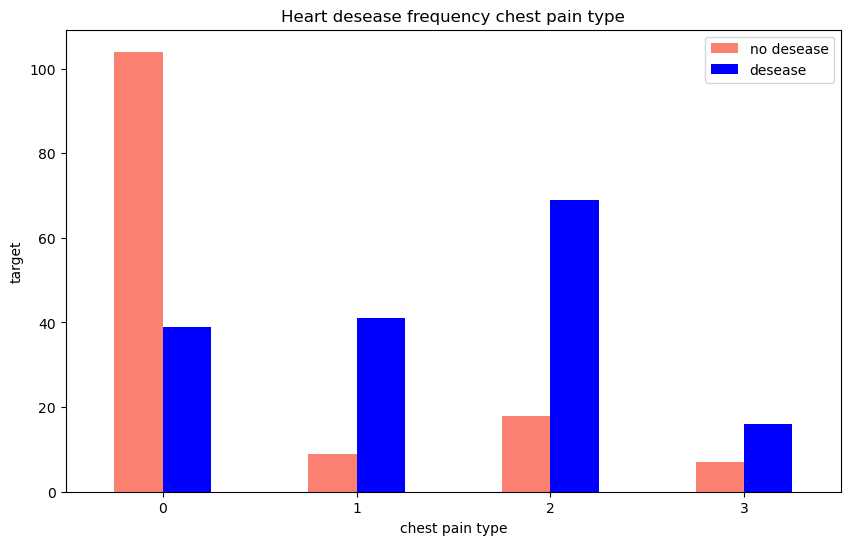

In [18]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                 figsize=(10,6),
                                 color=['salmon','blue'])

# Add some comunication
plt.title('Heart desease frequency chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('target')
plt.legend(['no desease','desease'])
plt.xticks(rotation=0)

In [19]:
### Make a corolation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


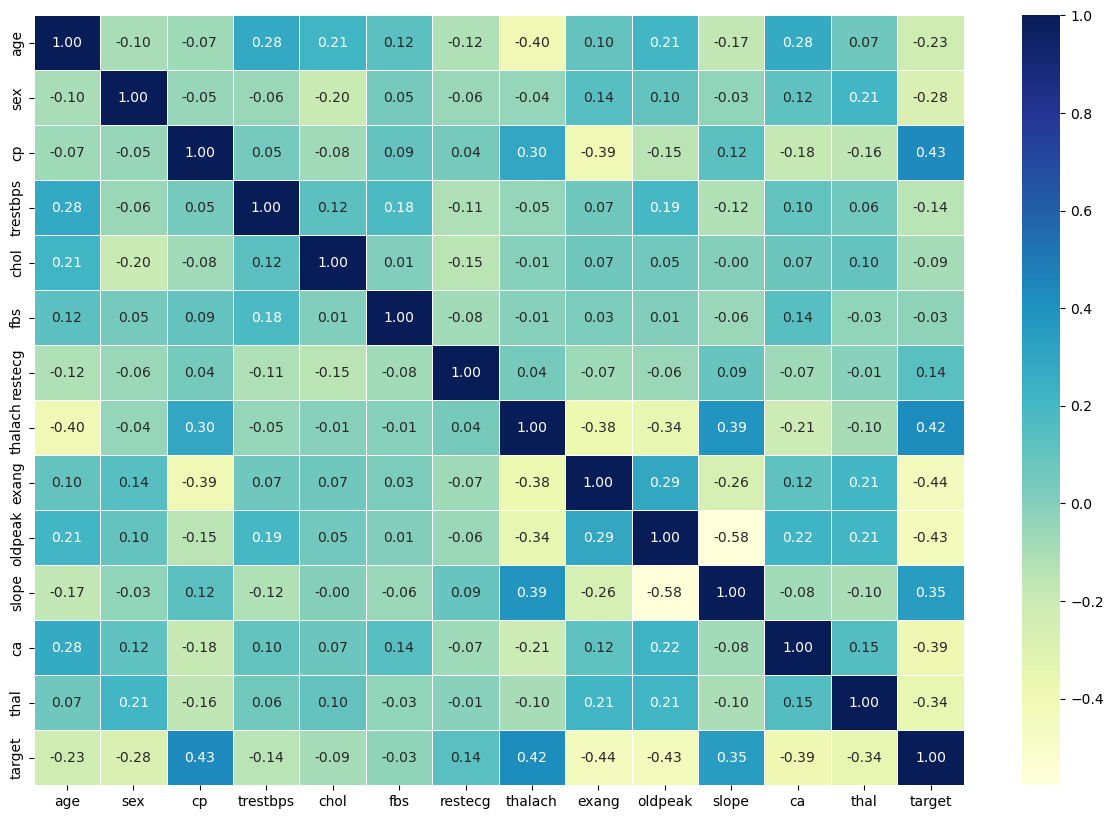

In [20]:
# Make a correlation matrix a little pretier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')
# What we can find in the table?
# More positive(more blue),more correlation between them
# as cp goes up the target value increses.
# negative correlation= a relation between two variables in which one var increases as the other decreases

### 5. Modelling 

In [21]:
#  sPLIT DATA TO X/Y
X =df.drop('target',axis=1)
y = df['target']



In [22]:
#  Data split into training/test sets
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= .2)

In [23]:
len(X_train),len(X_test),len(y_train),len(y_test)

(242, 61, 242, 61)

## Now we do Machine Learning
We are going to try 3 diferent ml models:
1. logistic regression 
2. K-Nearest Neibors classifier 
3. Random Forest classifier  

In [24]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given ML models.
    models: a dict of different sklearn ml models.
    X_train: training data(no labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test: testing labels

    """
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_score={}
    #loop through models
    for name,model in models.items():
        # fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_score[name]=model.score(X_test,y_test)
    return model_score
    

In [25]:
model_score = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_score

C:\Users\zahra\Documents\heart-desease\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparisson

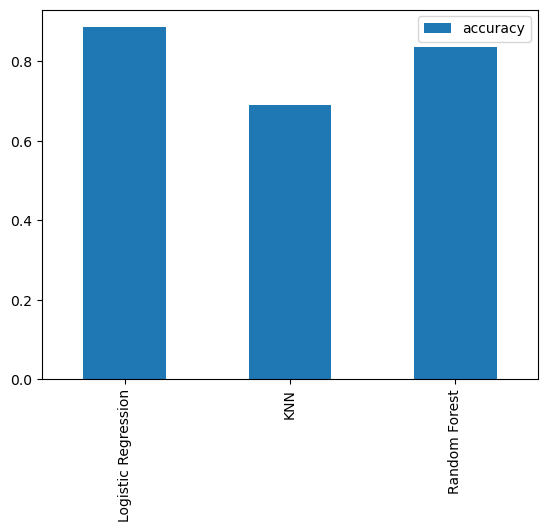

In [26]:
model_compare = pd.DataFrame(model_score,index=['accuracy'])
model_compare.T.plot.bar();

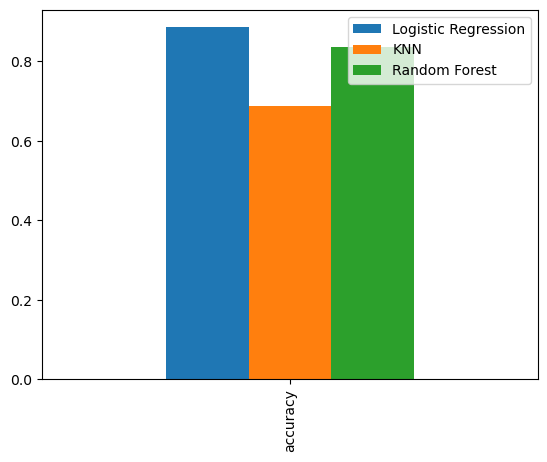

In [27]:
model_compare.plot.bar();

Now we've got a baseline model.
we know a model's first predictions are not always what we should based our next steps off.
what we should do?


Let's look at the following:

\\\genaral for almost all ml model:
* Hyperparameter tuning 
* Feature importance

\\\specified for classification:
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* Roc curve
* Area under the curve (AUC)


### Hyperparameter tuning (by hand)

In [28]:
# let's tune KNN

train_scores=[]
test_scores=[]

# Create alost of different values for n_neibours
neighbors = range(1,21)

#setup KNN instances
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors= i)
    
    #fit the algorithm
    knn.fit(X_train,y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum knn score on the set data: 75.41%


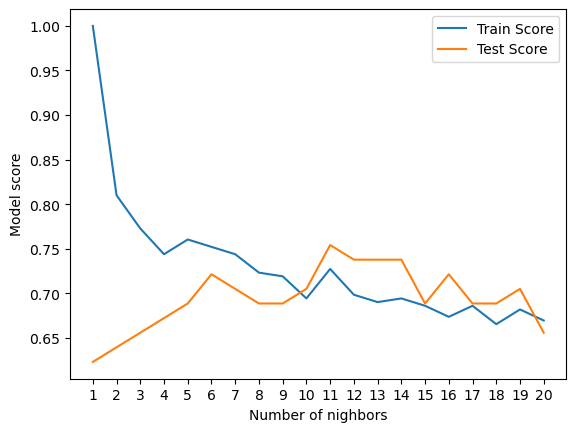

In [31]:
plt.plot(neighbors,train_scores,label='Train Score')
plt.plot(neighbors,test_scores,label='Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of nighbors')
plt.ylabel('Model score')
plt.legend()

print(f'maximum knn score on the set data: {max(test_scores)*100:.2f}%')

## Hyperparameter tyning with randomizedsearchCV

search: how to tune  alogistic regression machine learning in python

We r going to tune:
* LogisticRegression()
* randomForestClassifier()
...using RandomizedSeachCV


In [32]:
#  Create a hyperparameter grid for LogisticRegression
log_reg_grid={'C': np.logspace(-4,4,20),
              'solver':['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {'n_estimators': np.arange(10,1000,50),
          'max_depth': [None,3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models,
let's tune them using RandomizerSearchCV

In [33]:
# Tune logistic regression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                               n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogsticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression. let's do it for Random ForestClassifier

In [36]:
# Tune RandomForestClassifier

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.8688524590163934

In [39]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

1. by hand
2. raandomizedSearchCV
3. GridSearchCv

## hyperparameter tuning with GridSearchCV

Since our Logisticregression model provides the bestscore sofar,
we've try and improve them again using GridSearchCv.

In [40]:
#Different hyperparameter model for our LogisticRegression model

log_reg_grid ={'C': np.logspace(-4,4,30),
              'solver':['liblinear']}



# Setup random hyperparameter search for RandomForestClassifier
gs_log_reg = GridSearchCV(LogisticRegression(),
                           param_grid=log_reg_grid,
                           cv=5,
                           verbose=True)

# fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
# evaluate the rid search LogisticRegression model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

### Evaluationg our tuned ml classifier,beyond accuracy


* ROC curv and AUC score
* Confusion matrix
* classification report
* Precision
* Recall
* F1-score

To make comparison and evaluate our trained set model, first we need to make prediction.


In [43]:
# Make predictions with tuned model
y_pred = gs_log_reg.predict(X_test)

In [44]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

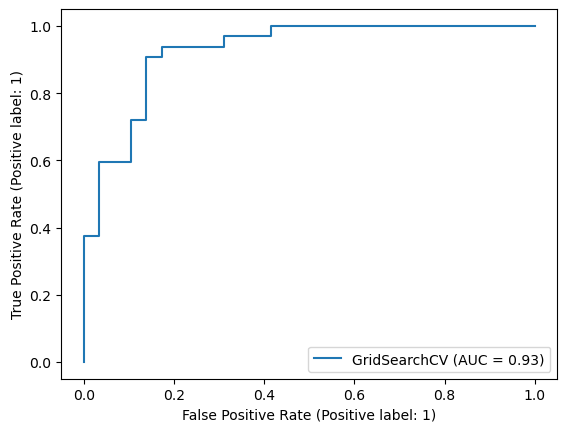

In [49]:
# Run ROc curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)

In [50]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


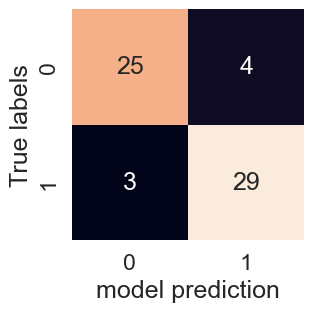

In [62]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_pred):
    """
    PLots a nice looking confusion matrix using seaborn's heatmap()

    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax= sns.heatmap(confusion_matrix(y_test,y_pred),
                    annot=True,# Annotate the box
                    cbar= False)
    
    plt.xlabel('model prediction') #predictions go on x-axis
    
    plt.ylabel('True labels') # Tru labels go on y-axis
    
plot_conf_mat(y_test,y_pred)
    

In [61]:
import sklearn
sklearn.__version__

'1.3.0'

Now we've got a ROC,an AUC metric and confusion matrix,let's get a classification report as well as cross-validation precision,recall and f1-score.

In [63]:
print(classification_report(y_test,y_pred))

# it is only calculated on one split: X_test

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



precision: the proportion of positive identification. so A.k.a the model predicts class 1 which is heart desease --> Actually Correct

recall: the proportion of actuall positives.

f1: combination of two above.

support: number of sampels

macro avg: pay attention when number of sampels are inballance (ex. 29,32 vs. 56,30)

weighted avg: each metric is calculated with respect to how many samples there are in each class.
IT is the weighted avg between recaal,f1,precision. 

## Calculate evaluation metrics using cross-validition 

calculate precision,f1-score,recall using cross-val-score()

In [65]:
# check best hyperparametes
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [69]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 0.20433597178569418,
                         solver= 'liblinear')

In [ ]:
# cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc

In [74]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [75]:
# cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [76]:
# cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [77]:
# cross-validated F1-score
cv_f1= cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

<Axes: title={'center': 'Cross-validated classificationmetrics'}>

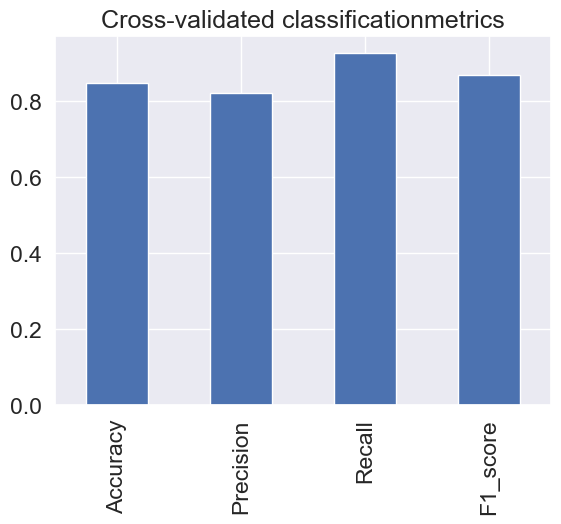

In [78]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1_score": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title='Cross-validated classificationmetrics',
                     legend=False)




### Feature importance

'which features contributed most to the outcomes of the model? and how did they contribute?'


Finding feature importance is different for each ml model.


In [80]:
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [81]:
#  Fit an instance of LogisticRegression
clf= LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')

clf.fit(X_train,y_train);

In [82]:
# chck coef_
clf.coef_

array([[ 0.00316728, -0.86044636,  0.66067051, -0.01156993, -0.00166374,
         0.04386116,  0.31275829,  0.02459361, -0.60413071, -0.56862818,
         0.45051626, -0.63609888, -0.67663381]])

In [83]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
# Match coef's of features to columns
feature_dic = dict(zip(df.columns,list(clf.coef_[0])))
feature_dic

{'age': 0.003167278990517721,
 'sex': -0.8604463644626569,
 'cp': 0.6606705054012705,
 'trestbps': -0.011569931335912368,
 'chol': -0.0016637438070300692,
 'fbs': 0.04386116284216185,
 'restecg': 0.31275829369964075,
 'thalach': 0.02459361297137234,
 'exang': -0.6041307139378419,
 'oldpeak': -0.5686281825180214,
 'slope': 0.450516263738603,
 'ca': -0.6360988840661891,
 'thal': -0.6766338062111971}

<Axes: title={'center': 'Feature Importance'}>

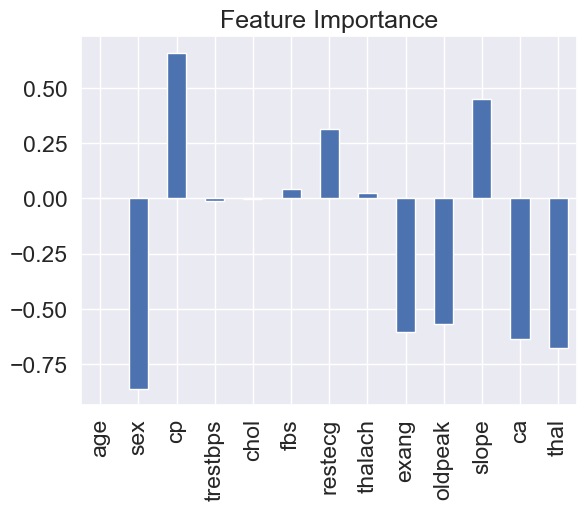

In [85]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dic,index=[0])
feature_df.T.plot.bar(title= 'Feature Importance',legend=False)

In [87]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [88]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
